In [1]:
#https://www.kaggle.com/tokutani/lee-carter-model
#http://www.actuaries.jp/lib/y_ronbun/H18-2.pdf

# arima : http://zhuanlan.zhihu.com/p/60648709
# svd : https://www.cnblogs.com/pinard/p/6251584.html

In [2]:
import pandas as pd
import numpy as np

In [3]:
CSV_FIlE = "../japan3.csv"
IMG_DIR = "./mf"

df = pd.read_csv(CSV_FIlE)
df, df_test = df[df["year"]<2010], df[df["year"]>=2010]
year = df["year"].to_numpy().reshape(-1,1)
age = df["age"].to_numpy().reshape(-1,1)
T = int(max(age) - min(age))
span = int(max(year) - min(year))
rate = df["rate"].to_numpy().reshape(-1,T+1)
rate

array([[0.01452139, 0.01633921, 0.01744255, ..., 0.46666667, 0.5       ,
        0.4       ],
       [0.01347565, 0.01349442, 0.01530892, ..., 0.37777778, 0.39285714,
        0.41176471],
       [0.01195558, 0.01345789, 0.01359709, ..., 0.41269841, 0.43243243,
        0.40909091],
       ...,
       [0.00329878, 0.00360296, 0.00388929, ..., 0.30328164, 0.32349896,
        0.34353481],
       [0.0033268 , 0.00351578, 0.00395875, ..., 0.31137048, 0.33187534,
        0.35298935],
       [0.00333587, 0.00351435, 0.00399912, ..., 0.30489039, 0.32557011,
        0.34604317]])

In [4]:
logm_xt = np.log(rate).T
a_x = logm_xt.mean(axis=1).reshape(-1,1)

z_xt = logm_xt - a_x

U,S,V = np.linalg.svd(z_xt, full_matrices=True)

b_x_k_t = U[0].reshape(-1,1)*S[0]*V[:,0].reshape(1,-1)
e_xt = z_xt - b_x_k_t

logm_xt_lcfitted = b_x_k_t + a_x

# bx,kt
b_x = S[0]*U[0]
k_t = V[:,0]

b_x.shape,k_t.shape,logm_xt.shape,a_x.shape

((51,), (63,), (51, 63), (51, 1))

In [22]:
S[0]/S.sum()

0.6280979123357496

array([1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])

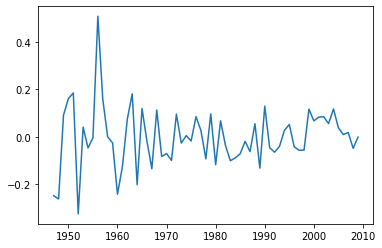

In [5]:
import seaborn as sns
sns.lineplot(year.reshape(-1,T+1)[:,0],k_t)
year.reshape(-1,T+1)[:,0]

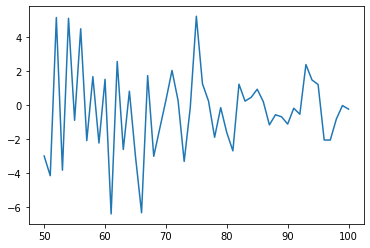

In [6]:
sns.lineplot(age.reshape(span+1,-1)[0], b_x)

In [36]:
np.diff(k_t)

array([-0.01382548,  0.35170127,  0.07027002,  0.02324589, -0.50813682,
        0.36469215, -0.08766803,  0.04299317,  0.51063524, -0.34828936,
       -0.15873634, -0.02530346, -0.21569314,  0.1155567 ,  0.19982384,
        0.10685118, -0.38203284,  0.31974855, -0.13718948, -0.11557795,
        0.2469023 , -0.19558008,  0.01244003, -0.02887621,  0.19439194,
       -0.12160202,  0.03161214, -0.0225275 ,  0.10241865, -0.0586279 ,
       -0.11899897,  0.18864708, -0.2130495 ,  0.18453448, -0.10418045,
       -0.06387489,  0.01233063,  0.01708344,  0.05222722, -0.04332805,
        0.11711561, -0.18674589,  0.26070824, -0.17471616, -0.01880912,
        0.0243886 ,  0.06716352,  0.02509395, -0.09408375, -0.01444539,
        0.00060569,  0.17231261, -0.04937724,  0.01562553,  0.00172983,
       -0.02884968,  0.0617311 , -0.07943943, -0.02838762,  0.00858491,
       -0.06621527,  0.04666151])

[[ 50  51  52 ...  98  99 100]
 [ 50  51  52 ...  98  99 100]
 [ 50  51  52 ...  98  99 100]
 ...
 [ 50  51  52 ...  98  99 100]
 [ 50  51  52 ...  98  99 100]
 [ 50  51  52 ...  98  99 100]]


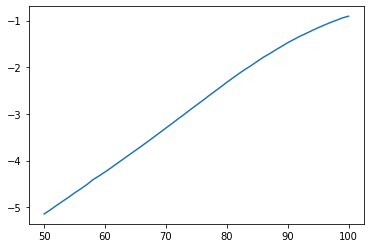

In [7]:
print(age.reshape(span+1,-1))
sns.lineplot(age.reshape(span+1,-1)[0], a_x[:,0])

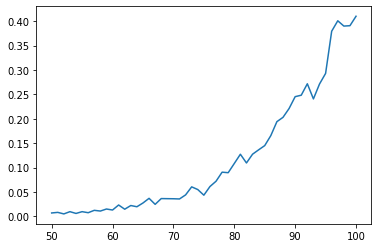

In [8]:
sns.lineplot(age.reshape(span+1,-1)[0],np.exp(logm_xt_lcfitted[:,40]))

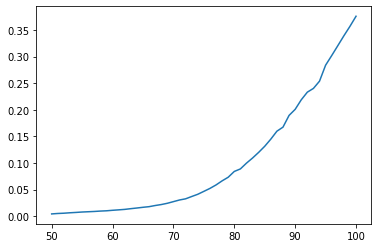

In [9]:
sns.lineplot(age.reshape(span+1,-1)[0],np.exp(logm_xt[:,40]))

In [60]:
chk = logm_xt_lcfitted - a_x
chk = chk - np.dot(b_x.reshape(-1,1),k_t.reshape(-1,1).T)
chk = chk*chk
print(chk.sum())

8.09574907574333e-29


In [10]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe8a505b2b0>,
 (-3.9931006943667975,
  0.0014470720495600403,
  7,
  54,
  {'1%': -3.55770911573439,
   '5%': -2.9167703434435808,
   '10%': -2.59622219478738},
  -88.17199625222446))

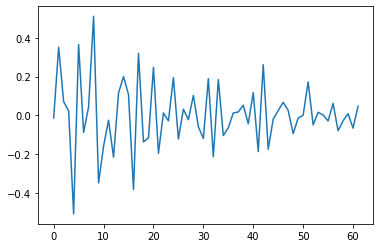

In [11]:
k_t_ADF = ADF(np.diff(k_t))
sns.lineplot(np.arange(len(np.diff(k_t))),np.diff(k_t)),k_t_ADF

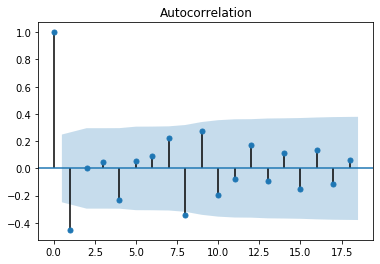

In [12]:
acf = sm.graphics.tsa.plot_acf(np.diff(k_t))

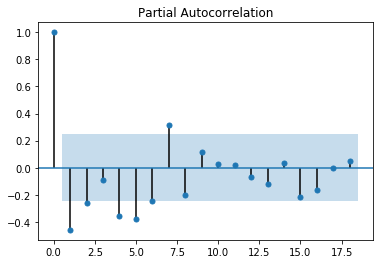

In [13]:
pacf = sm.graphics.tsa.plot_pacf(np.diff(k_t))

In [14]:
trend_evaluate = sm.tsa.arma_order_select_ic(np.diff(k_t), ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=6)

/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversio

In [15]:
trend_evaluate

{'aic':            0          1          2          3          4          5          6
 0        NaN -71.806239 -70.039827 -68.483669 -66.914272 -74.907437 -72.994868
 1 -51.352097 -70.010871 -72.100309 -70.353766 -68.356348 -72.978486 -70.908726
 2 -53.542876 -68.326873 -70.364036 -69.394839 -67.399633 -71.827440 -69.259811
 3 -52.261990 -67.208984 -66.305689 -72.280369 -71.185932 -72.444362 -70.715283
 4 -59.435412 -69.237779 -70.334354 -68.827597 -73.449687 -67.833427 -68.618393,
 'bic':            0          1          2          3          4          5          6
 0        NaN -67.551971 -63.658424 -59.975132 -56.278600 -62.144630 -58.104927
 1 -47.097829 -63.629468 -63.591772 -59.718094 -55.593541 -58.088545 -53.891651
 2 -47.161472 -59.818335 -59.728364 -56.632033 -52.509692 -54.810365 -50.115601
 3 -43.753453 -56.573313 -53.542883 -57.390428 -54.168857 -53.300153 -49.443939
 4 -48.799740 -56.474972 -55.444414 -51.810522 -54.305477 -46.562083 -45.219915,
 'aic_min_order': (0, 5)

In [51]:
model = ARIMA(k_t, order=(2,1,1))

In [52]:
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   62
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  38.333
Method:                       css-mle   S.D. of innovations              0.126
Date:                Wed, 03 Mar 2021   AIC                            -66.666
Time:                        23:16:50   BIC                            -56.031
Sample:                             1   HQIC                           -62.490
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.581      0.562      -0.001       0.002
ar.L1.D.y      0.0539      0.130      0.413      0.679      -0.202       0.309
ar.L2.D.y     -0.0744      0.134     -0.555      0.579      -0.338       0.189
ma.L1.D.y     -1.0000      0.048    -20.949      0.000      -1.094      -0.906
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.3619           -3.6470j            3.6650           -0.2343
AR.2            0.3619           +3.6470j            3.6650            0.2343
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

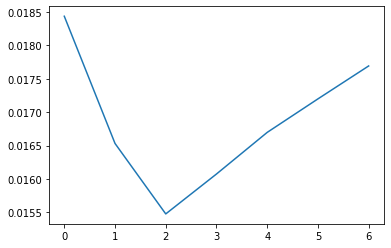

In [53]:
sns.lineplot(np.arange(7),model_fit.forecast(steps = 7)[0])

In [54]:
# age 90 = #41
df_test[df_test["age"]==90]

,Unnamed: 0,age,year,D,L,rate
3253,3254,90,2010,3530,21308,0.165665
3304,3305,90,2011,3438,21164,0.162446
3355,3356,90,2012,3648,22073,0.165270
3406,3407,90,2013,3630,22875,0.158689
3457,3458,90,2014,3716,23977,0.154982
3508,3509,90,2015,3865,24821,0.155715
3559,3560,90,2016,3959,25567,0.154848


In [55]:
b_x[41]*model_fit.forecast(steps = 7)[0]

array([-0.00359504, -0.00322396, -0.00301843, -0.00313482, -0.00325624,
       -0.00335397, -0.00345004])

In [56]:
age_90_predict = np.exp(a_x[41] + b_x[41]*model_fit.forecast(steps = 7)[0])
age_90_predict

array([0.24451405, 0.2446048 , 0.24465508, 0.2446266 , 0.2445969 ,
       0.244573  , 0.2445495 ])

In [41]:
rate[:,41]

array([0.3487395 , 0.28262548, 0.30033557, 0.32087227, 0.30708661,
       0.29119497, 0.3245614 , 0.28822816, 0.29160063, 0.30769231,
       0.32660903, 0.28332462, 0.28314239, 0.31258367, 0.30402477,
       0.30234316, 0.29521932, 0.28741093, 0.31426851, 0.28815733,
       0.27506427, 0.29448124, 0.28673835, 0.28795812, 0.26173633,
       0.2642547 , 0.280664  , 0.27125036, 0.27068618, 0.2690158 ,
       0.24647035, 0.254804  , 0.24318069, 0.25725836, 0.24409061,
       0.22255193, 0.24311589, 0.2237055 , 0.22483134, 0.21995036,
       0.21875344, 0.22179914, 0.21457233, 0.21727263, 0.21947704,
       0.21776093, 0.21282944, 0.20759563, 0.21537416, 0.19991763,
       0.19429359, 0.20012349, 0.20148651, 0.19137562, 0.18898379,
       0.17923979, 0.18231582, 0.17717258, 0.18422065, 0.17599666,
       0.17576892, 0.17883297, 0.17455004])

In [45]:
span

62

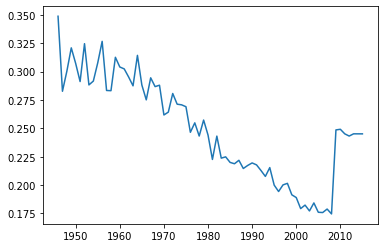

In [47]:
sns.lineplot(np.arange(1946,1946+span+7+1),np.concatenate([rate[:,41],age_90_predict]))